In [21]:
# from the datasets module of scikit learn, import the load_digits function
from sklearn.datasets import load_digits
# from the matplotlib library, import the pyplot module, for plotting. We give it the name plt as this is standard practice
from matplotlib import pyplot as plt
# from scikit learn, import Principal Components Analysis
from sklearn.decomposition import PCA
# import numpy and name it np, as this is standard practice
import numpy as np

In [4]:
# let us import the digits dataset
digits = load_digits()

# let us see what's in the digits variable now
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [5]:
# the variable digits seems to be a dictionary. Let's see what keys it has
print(list(digits.keys()))

['data', 'target', 'target_names', 'images', 'DESCR']


In [6]:
# we can inspect the value of each of these keys. For instance, if we print the value for data, we get a pointcloud of 1797 points in R^64
digits['data'].shape

(1797, 64)

In [10]:
# the value of target contains the label for each of the 1797 images
print(digits['target'].shape)

# let's display the label for the first 25 digits
print(digits['target'][:25])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [12]:
# the data consists of a specific encoding of each image. The images themselves are the value of the "images" keys:
digits['images'].shape

# we see that there are 1797 elements, each consisting of a 8 by 8 vector/matrix

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

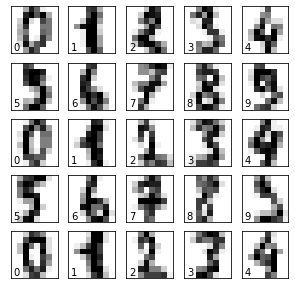

<Figure size 432x288 with 0 Axes>

In [17]:
# let us display the first 25 images, with their corresponding label

fig = plt.figure(figsize=(5, 5))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))

plt.figure()

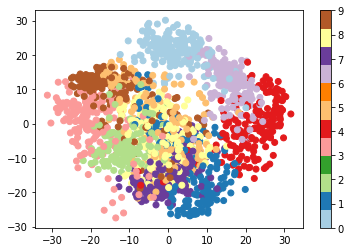

In [19]:
# let's display the first two principal components of each element in the pointcloud

# we construct a PCA object with 2 components
pca = PCA(n_components=2)

# we compute the 2D projection of the digits data
proj2d = pca.fit_transform(digits.data)

# we display the projection, coloring each point by its label
plt.scatter(proj2d[:, 0], proj2d[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

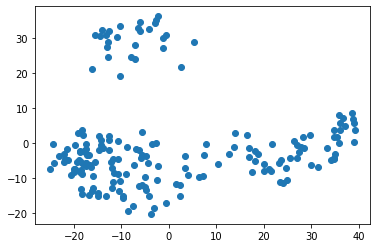

In [23]:
# let us now do a 2D projection of just one of the classes, to try to interpret what the 2 principal components are recovering in that case

# find the indices for the images that contain a 1
indices = np.where(digits['target']==1)[0]

# project to 2D only the 1's
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data[indices])
plt.scatter(proj[:,0],proj[:,1])
plt.show()

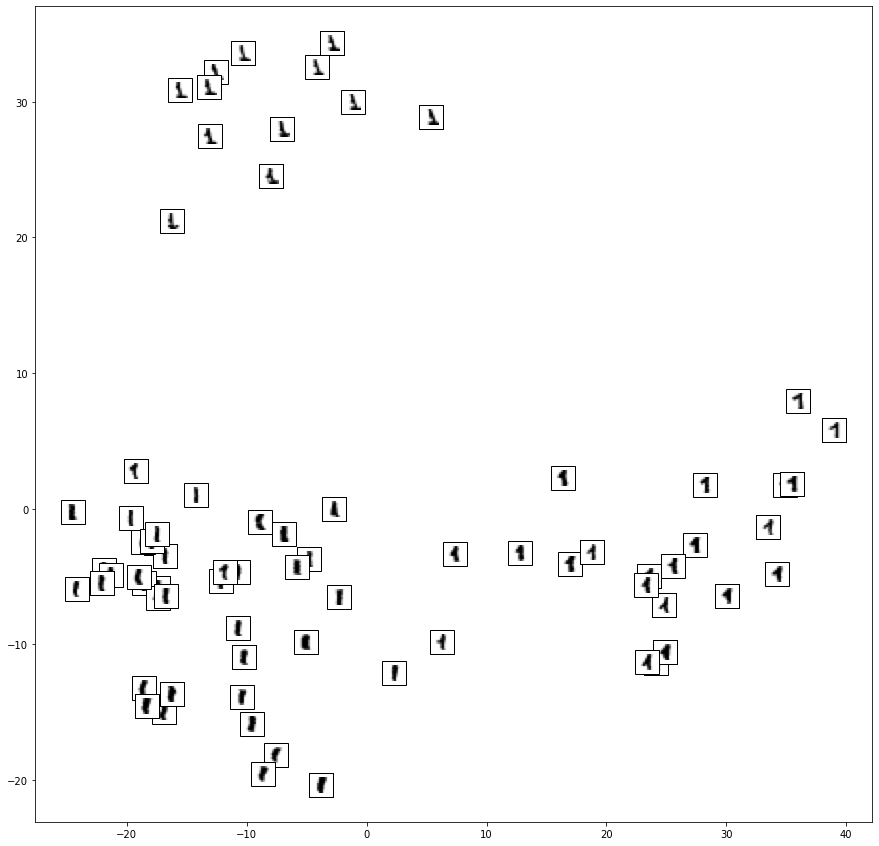

In [50]:
# there seems to be a fair amount of structure in the plot above.
# for instance, there seem to be two distinct clusters, one with significantly fewer points. The larger cluster seems also have nontrivial structure.
# let's now plot some of the digits on top of their corresponding point in the 2D embedding, to try to understand what the 2 principal components are capturing

# plotting all the images would be too much, so let us just plot 100
subsample = np.random.choice(len(indices), 100)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(proj[subsample,0], proj[subsample,1]) 

for x0, y0, im in zip(proj[subsample,0], proj[subsample,1],digits["images"][indices][subsample]):
    ab = AnnotationBbox(OffsetImage(im, cmap='binary',zoom=2), (x0, y0))
    ax.add_artist(ab)

In [51]:
# interpret the plot above!